# Procesamiento de datos con [*pandas*](https://pandas.pydata.org/)


Es una librería para **leer, manipular y procesar datos** con lenguaje Python 

Pandas provee
- Dos estructuras de datos *Dataframe* y *Series*
- Herramientas eficientes de análisis de datos que trabajan sobre estas estructuras

Pandas se combina bien con NumPy y Matplotlib 

Instala pandas si aun no lo haz hecho:

    conda install pandas
    
    pip install pandas --user
    
    sudo pacman -S python-pandas

In [1]:
import pandas as pd
print("Versión de pandas "+pd.__version__)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Versión de pandas 0.24.2


## Estructuras de datos de pandas

- *Series* se usa para representar secuencias: Una columna de datos
- *Dataframe* se usa para representar tablas: Múltiples columnas de datos
- Las filas y las columnas están etiquetadas
- La etiqueta de las filas se llama **indice**
- Por defecto el índice es número entero que parte de cero pero podemos especificarlo como queramos
- Estas estructuras pueden soportan múltiples tipos y NaNs (missing data)

Por ejemplo una [serie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):

In [2]:
s = pd.Series(["asd", 4521, 24.2142])
print(s)
print([type(x) for x in s])
s = pd.Series([3.124, 5.124, 2.1416, 10.])
print(s)
print([type(x) for x in s])

0        asd
1       4521
2    24.2142
dtype: object
[<class 'str'>, <class 'int'>, <class 'float'>]
0     3.1240
1     5.1240
2     2.1416
3    10.0000
dtype: float64
[<class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>]


In [3]:
# Atributos index y values
print(s.index)
print(s.values)

RangeIndex(start=0, stop=4, step=1)
[ 3.124   5.124   2.1416 10.    ]


In [4]:
# Soporta slicing e indexación con arreglo de índices
print(s[0:2])
print(s[-2:])
print(s[[0, 2, 1, 3]])

0    3.124
1    5.124
dtype: float64
2     2.1416
3    10.0000
dtype: float64
0     3.1240
2     2.1416
1     5.1240
3    10.0000
dtype: float64


El índice no tiene que ser númerico

Idealmente el índice debería ser informativo por si mismo, por ejemplo:

In [5]:
s = pd.Series([0.36, -0.31, -0.6, 0.0], 
              index=["AGUAS-A", "BSANTANDER", "CMPC", "ENTEL"],
              name='% variación')
print(s)

AGUAS-A       0.36
BSANTANDER   -0.31
CMPC         -0.60
ENTEL         0.00
Name: % variación, dtype: float64


In [6]:
# A diferencia de un diccionario de Python, la serie soporta slicing (tiene orden)
print(s["BSANTANDER":"CMPC"])
# E indexación con otro arreglo
print(s[["CMPC", "AGUAS-A"]])

BSANTANDER   -0.31
CMPC         -0.60
Name: % variación, dtype: float64
CMPC      -0.60
AGUAS-A    0.36
Name: % variación, dtype: float64


In [7]:
# Se puede construir una serie a partir de escalares, listas, diccioanrios y ndarray

print(pd.Series(2.14159, index=np.arange(5)))

print(pd.Series([4, 3, 2, 1, 0]))

print(pd.Series(np.random.randn(5)))

print(pd.Series({'Valdivia': 143207, 'Santiago': 5614000}))

0    2.14159
1    2.14159
2    2.14159
3    2.14159
4    2.14159
dtype: float64
0    4
1    3
2    2
3    1
4    0
dtype: int64
0   -0.231338
1   -1.263152
2   -1.204559
3   -0.800015
4   -0.949369
dtype: float64
Valdivia     143207
Santiago    5614000
dtype: int64


¿Qué podemos hacer con la [serie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)?

In [8]:
print(s)
print("\nReducciones y estadísticos:")
print(s.sum())
print(s.cumsum().values)  # Suma acumulada
print(s.mean())  # Media
print(s.std())  # Desviación estándar
print(s.quantile(q=0.5))  # Mediana
print(s.min())
print(s.idxmin())
print("\nOperaciones lógicas:")
print(s<0) # Equivalente a s.lt(0)
print((s>-0.5) & (s<0.2))
print("\nResumen:")
print(s.describe())

AGUAS-A       0.36
BSANTANDER   -0.31
CMPC         -0.60
ENTEL         0.00
Name: % variación, dtype: float64

Reducciones y estadísticos:
-0.55
[ 0.36  0.05 -0.55 -0.55]
-0.1375
0.41234087840038364
-0.155
-0.6
CMPC

Operaciones lógicas:
AGUAS-A       False
BSANTANDER     True
CMPC           True
ENTEL         False
Name: % variación, dtype: bool
AGUAS-A       False
BSANTANDER     True
CMPC          False
ENTEL          True
Name: % variación, dtype: bool

Resumen:
count    4.000000
mean    -0.137500
std      0.412341
min     -0.600000
25%     -0.382500
50%     -0.155000
75%      0.090000
max      0.360000
Name: % variación, dtype: float64


También podemos graficarlo

<IPython.core.display.Javascript object>


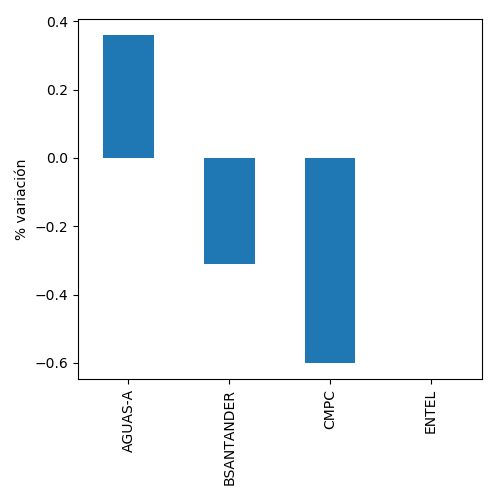

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
s.plot(ax=ax, kind='bar')
ax.set_ylabel(s.name);

# kind = {line, bar, barh, hist, box, kde, area, pie}

### Dataframe

- Un *dataframe* es una tabla
- Es un conjunto de *series* que comparten índice
- Cada serie es una columna del *dataframe*

Un dataframe se puede crear a partir de una serie

In [10]:
df = pd.DataFrame(s)
df

,% variación
AGUAS-A,0.36
BSANTANDER,-0.31
CMPC,-0.60
ENTEL,0.00


In [11]:
# Atributos para acceder al índice de columna y fila
print(df.columns)
print(df.index)

Index(['% variación'], dtype='object')
Index(['AGUAS-A', 'BSANTANDER', 'CMPC', 'ENTEL'], dtype='object')


In [12]:
# Atributos informativos
print(df.dtypes)
print(df.info())

% variación    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, AGUAS-A to ENTEL
Data columns (total 1 columns):
% variación    4 non-null float64
dtypes: float64(1)
memory usage: 224.0+ bytes
None


O más de una serie

In [13]:
s2 = pd.Series([1653, 3531, 5998, 1408], 
              index=["AGUAS-A", "BSANTANDER", "CMPC", "ENTEL"],
              name='Monto M$')
df = pd.concat([s, s2], axis=1)
df

,% variación,Monto M$
AGUAS-A,0.36,1653
BSANTANDER,-0.31,3531
CMPC,-0.60,5998
ENTEL,0.00,1408


O una ndarray bidimensional

In [14]:
pd.DataFrame(np.eye(2), columns=["a", "b"], index=["1", "2"])

,a,b
1,1.0,0.0
2,0.0,1.0


O de una lista de diccionarios

In [15]:
pd.DataFrame([{'nombre': nombre, 'apellido': apellido} for nombre, apellido in zip(["pablo", "fulano"], ["huijse", "de tal"])])

,apellido,nombre
0,huijse,pablo
1,de tal,fulano


Podemos recuperar una columna completa con

In [16]:
print(df["Monto M$"])
print(df["% variación"])

AGUAS-A       1653
BSANTANDER    3531
CMPC          5998
ENTEL         1408
Name: Monto M$, dtype: int64
AGUAS-A       0.36
BSANTANDER   -0.31
CMPC         -0.60
ENTEL         0.00
Name: % variación, dtype: float64


Podemos recuperar una fila completa usando el atributo `loc` o `iloc`

In [17]:
print(df.loc["CMPC"])
print(df.loc[["CMPC", "AGUAS-A"]])
print(df.loc["AGUAS-A":"CMPC"])

% variación      -0.6
Monto M$       5998.0
Name: CMPC, dtype: float64
         % variación  Monto M$
CMPC           -0.60      5998
AGUAS-A         0.36      1653
            % variación  Monto M$
AGUAS-A            0.36      1653
BSANTANDER        -0.31      3531
CMPC              -0.60      5998


In [18]:
print(df.iloc[2])
print(df.iloc[[2, 0]])
print(df.iloc[:3])

% variación      -0.6
Monto M$       5998.0
Name: CMPC, dtype: float64
         % variación  Monto M$
CMPC           -0.60      5998
AGUAS-A         0.36      1653
            % variación  Monto M$
AGUAS-A            0.36      1653
BSANTANDER        -0.31      3531
CMPC              -0.60      5998


In [19]:
df.loc["CMPC"]["Monto M$"]

5998.0

In [20]:
df["Monto M$"].loc["CMPC"]

5998